<div class="alert alert-block alert-info">
<b>Tip:</b> Install the jupyter notebook first.
</div>

# Installing Jupyter Notebook in terminal

```bash
# Navigate to the home directory
cd ~

# Install Jupyter Notebook using pip3
pip3 install jupyter


In [2]:
# import modulus
import pandas as pd
# import os
# script_path = 'missing_table.py'
# os.system(f'python3 {script_path}')
# !python missing_table.py
# from missing_table import missing_value_df
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# This function converts the string into the type of datetime %d/%m/%Y
def convert_date_format(date_str):
    try:
        date_time_obj = datetime.strptime(date_str, '%d/%m/%Y %H:%M')
        formatted_date = date_time_obj.strftime('%m/%d/%Y')
        return formatted_date
    except ValueError:
        pass

    try:
        date_time_obj = datetime.strptime(date_str, '%d/%m/%Y')
        return date_str
    except ValueError:
        raise ValueError(f"Unsupported date format: {date_str}")

In [4]:
#  count the week in per week or fornightly
slice = 14

# Plot without threshold

In [5]:
# Without threshold:
# note: More needs to be added to this script to clean the columns as needs be
# edit: 

# edit: changed filed path
df0 = pd.read_csv("../raw_data/australia.csv",
                 na_values=[" ", "__NA__", "NAN"], keep_default_na = True, low_memory=False)

# create a new column in the csv that computer from week 1 for every two weeks 
df0["endtime"] = df0["endtime"].apply(convert_date_format)
df0["endtime"] = pd.to_datetime(df0["endtime"])
df0 = df0.sort_values(by=["endtime"])
# Find the start date (minimum date) and end date (maximum date)
start_date = df0['endtime'].min()
end_date = df0['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df0['week_number'] = ((df0['endtime'] - start_date).dt.days // slice) + 1

frequency_dict = {"Always": 1, "Frequently": 1, "Sometimes": 0, "Rarely": 0, "Not at all": 0}
df0["i12_health_1"] = df0["i12_health_1"].map(frequency_dict)

df0_count = df0.groupby(["week_number", "endtime", "state", "i12_health_1"]).size().unstack(fill_value=0).reset_index()
df0_count.columns = ["week_number", "endtime", "state", 
                    "wearing mask = 'No'", "wearing mask = 'Yes'"]
# plot figures in states. proportion
df0_count["prop_no"] = df0_count["wearing mask = 'No'"] / (df0_count["wearing mask = 'No'"] + df0_count["wearing mask = 'Yes'"])
df0_count["prop_yes"] = df0_count["wearing mask = 'Yes'"] / (df0_count["wearing mask = 'No'"] + df0_count["wearing mask = 'Yes'"])
# the regulation dates
states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"], 
    "Western Australia": ["23/4/2021", "9/9/2022"]
}
# # Plotting figures for each state in two columns
# states = df0_count["state"].unique()
# num_states = len(states)
# cols = len(df0.columns)
# rows = len(df0)

# fig, axes = plt.subplots(num_states // 2, 2, figsize=(15, 5 * (num_states // 2 + num_states % 2)))

# for idx, state in enumerate(states):
#     ax = axes[idx // 2, idx % 2] if num_states > 1 else axes
    
#     state_df0 = df0_count[df0_count["state"] == state]
    
#     ax.bar(state_df0["week_number"], state_df0["prop_yes"], label="Wearing Mask = 'Yes'")
#     ax.bar(state_df0["week_number"], state_df0["prop_no"], bottom=state_df0["prop_yes"], label="Wearing Mask = 'No'")
    
#     # Add vertical lines for start and end times
#     start_time, end_time = states_data[state]
        
#     if start_time:
#         start_time = pd.to_datetime(start_time, format='%d/%m/%Y')
#         ax.axvline(x=((start_time - start_date).days // slice) + 1, color='purple', linestyle='--', linewidth = 3, label='Face mask mandate Starts')
#     if end_time and (state == "Australian Capital Territory" or state == "Queensland" or state == "Tasmania"):
#         end_time = pd.to_datetime(end_time, format='%d/%m/%Y')
#         ax.axvline(x=((end_time - start_date).days // slice) + 1, color='yellow', linestyle='--', linewidth = 3, label='Face mask mandate Ends')
        
#     ax.set_title(f"Percentage of Wearing Mask outside home in {state}")
#     ax.set_xlabel("End time")
#     ax.set_ylabel("Percentage")
#     ax.set_xlim(0,52)
#     ax.set_ylim(0, 1)  # Fixing y-axis at 1
#     ax.text(0.9, 0.9, f"No. of cleaned columns is {rows}x{cols}")
#     ax.legend()

# plt.tight_layout()
# plt.savefig("../figures/states_in_proportion_threshold0.png")
# plt.show()

# Plot with less than 1006 missing value

In [ ]:
df = pd.read_csv("../raw_data/australia.csv",
                 na_values=[" ", "__NA__", "NAN"], keep_default_na = True, low_memory=False)
df["endtime"] = df["endtime"].apply(convert_date_format)
df["endtime"] = pd.to_datetime(df["endtime"])
df = df.sort_values(by=["endtime"])
# Find the start date (minimum date) and end date (maximum date)
start_date = df['endtime'].min()
end_date = df['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df['week_number'] = ((df['endtime'] - start_date).dt.days // slice) + 1

frequency_dict = {"Always": 1, "Frequently": 1, "Sometimes": 0, "Rarely": 0, "Not at all": 0}
df["i12_health_1"] = df["i12_health_1"].map(frequency_dict)
# Filter out the day with less than 5 data points
# df_grouped_size = df.groupby("endtime").size()

# # Filter out groups with sizes less than 5
# valid_endtimes = df_grouped_size[df_grouped_size >= 0].index

# # Filter the original DataFrame to keep only rows with valid endtimes
# df = df[df["week_number"].isin(valid_endtimes)]

# Set the threshold for missing value count
# edit: change cound to 1006
thresh_value = 1006

# Extract the variable names with missing value counts larger than 1006
columns_to_drop = missing_value_df.loc[missing_value_df['Missing Value Count']
                                       > thresh_value, 'Variable Name'].tolist()

df.drop(columns=columns_to_drop, inplace=True)
df.dropna(inplace=True)

print(df)

In [ ]:
# plot states_in_proportion pre-setting

# Assuming df is your original dataframe
df_count = df.groupby(["week_number", "endtime", "state", "i12_health_1"]).size().unstack(fill_value=0).reset_index()
df_count.columns = ["week_number", "endtime", "state", 
                    "wearing mask = 'No'", "wearing mask = 'Yes'"]
# plot figures in states. proportion
df_count["prop_no"] = df_count["wearing mask = 'No'"] / (df_count["wearing mask = 'No'"] + df_count["wearing mask = 'Yes'"])
df_count["prop_yes"] = df_count["wearing mask = 'Yes'"] / (df_count["wearing mask = 'No'"] + df_count["wearing mask = 'Yes'"])
# the regulation dates
states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"], 
    "Western Australia": ["23/4/2021", "9/9/2022"]
}

print(df_count[df_count["state"]== "Australian Capital Territory"])

In [ ]:
# Plotting figures for each state in two columns
states = df_count["state"].unique()
num_states = len(states)
cols = len(df.columns)
rows = len(df)

fig, axes = plt.subplots(num_states // 2, 2, figsize=(15, 5 * (num_states // 2 + num_states % 2)))

for idx, state in enumerate(states):
    ax = axes[idx // 2, idx % 2] if num_states > 1 else axes
    
    state_df = df_count[df_count["state"] == state]
    
    ax.bar(state_df["week_number"], state_df["prop_yes"], label="Wearing Mask = 'Yes'")
    ax.bar(state_df["week_number"], state_df["prop_no"], bottom=state_df["prop_yes"], label="Wearing Mask = 'No'")
    
    # Add vertical lines for start and end times
    start_time, end_time = states_data[state]
        
    if start_time:
        start_time = pd.to_datetime(start_time, format='%d/%m/%Y')
        ax.axvline(x=((start_time - start_date).days // slice) + 1, color='purple', linestyle='--', linewidth = 3, label='Face mask mandate Starts')
    if end_time and (state == "Australian Capital Territory" or state == "Queensland" or state == "Tasmania"):
        end_time = pd.to_datetime(end_time, format='%d/%m/%Y')
        ax.axvline(x=((end_time - start_date).days // slice) + 1, color='yellow', linestyle='--', linewidth = 3, label='Face mask mandate Ends')
        
    ax.set_title(f"Percentage of Wearing Mask outside home in {state}")
    ax.set_xlabel("End time")
    ax.set_ylabel("Percentage")
    ax.set_xlim(0,52)
    ax.set_ylim(0, 1)  # Fixing y-axis at 1
    ax.text(0.9, 0.9, f"No. of cleaned columns is {rows}x{cols}")
    ax.legend()

plt.tight_layout()

plt.savefig("../figures/states_in_proportion_threshold1006.png")
plt.show()

# Plot those columns with less than 10029 missing value

In [ ]:
# ANOTHER TRY: threshold = 10029
# note: More needs to be added to this script to clean the columns as needs be

# edit: changed filed path
df2 = pd.read_csv("../raw_data/australia.csv",
                 na_values=[" ", "__NA__", "NAN"], keep_default_na = True, low_memory=False)

# create a new column in the csv that computer from week 1 for every two weeks 
df2["endtime"] = df2["endtime"].apply(convert_date_format)
df2["endtime"] = pd.to_datetime(df2["endtime"])

# Find the start date (minimum date) and end date (maximum date)
start_date = df2['endtime'].min()
end_date = df2['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df2['week_number'] = ((df2['endtime'] - start_date).dt.days // slice) + 1

# Filter out the day with less than 300 data points
# df2_grouped_size = df2.groupby("week_number").size()

# # Filter out groups with sizes less than 300
# valid_endtimes = df2_grouped_size[df2_grouped_size >= 0].index

# # Filter the original DataFrame to keep only rows with valid endtimes
# df2 = df2[df2["week_number"].isin(valid_endtimes)]

# print(df2_grouped_size)
# Set the threshold for missing value count
# edit: change cound to 10029
thresh_value = 70014

# Extract the variable names with missing value counts larger than 10029
columns_to_drop = missing_value_df.loc[missing_value_df['Missing Value Count']
                                       > thresh_value, 'Variable Name'].tolist()

df2.drop(columns=columns_to_drop, inplace=True)
df2.dropna(inplace=True)

states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"], 
    "Western Australia": ["23/4/2021", "9/9/2022"]
}

print(df2)

In [ ]:
# plot states_in_proportion pre-setting

df2["endtime"] = pd.to_datetime(df2["endtime"])   
df2 = df2.sort_values(by=["endtime"])

frequency_dict = {"Always": 1, "Frequently": 1, "Sometimes": 0, "Rarely": 0, "Not at all": 0}
df2["i12_health_1"] = df2["i12_health_1"].map(frequency_dict)

# Assuming df2 is original dataframe
df2_count = df2.groupby(["week_number", "endtime", "state", "i12_health_1"]).size().unstack(fill_value=0).reset_index()
df2_count.columns = ["week_number", "endtime", "state", 
                    "wearing mask = 'No'", "wearing mask = 'Yes'"]
# plot figures in states. proportion
df2_count["prop_no"] = df2_count["wearing mask = 'No'"] / (df2_count["wearing mask = 'No'"] + df2_count["wearing mask = 'Yes'"])
df2_count["prop_yes"] = df2_count["wearing mask = 'Yes'"] / (df2_count["wearing mask = 'No'"] + df2_count["wearing mask = 'Yes'"])

print(df2_count[df2_count["state"]== "Australian Capital Territory"])

In [ ]:
# Plotting figures for each state in two columns
states = df_count["state"].unique()
num_states = len(states)
cols = len(df2.columns)
rows = len(df2)

fig, axes = plt.subplots(num_states // 2, 2, figsize=(15, 5 * (num_states // 2 + num_states % 2)))

for idx, state in enumerate(states):
    ax = axes[idx // 2, idx % 2] if num_states > 1 else axes
    
    state_df2 = df2_count[df2_count["state"] == state]
    
    ax.bar(state_df2["week_number"], state_df2["prop_yes"], label="Wearing Mask = 'Yes'")
    ax.bar(state_df2["week_number"], state_df2["prop_no"], bottom=state_df2["prop_yes"], label="Wearing Mask = 'No'")
    
    # Add vertical lines for start and end times
    start_time, end_time = states_data[state]
    if start_time:
        start_time = pd.to_datetime(start_time, format='%d/%m/%Y')
        ax.axvline(x=((start_time - start_date).days // slice) + 1, color='purple', linestyle='--', linewidth = 3, label='Face mask mandate Starts')
    if end_time and (state == "Australian Capital Territory" or state == "Queensland" or state == "Tasmania"):
        end_time = pd.to_datetime(end_time, format='%d/%m/%Y')
        ax.axvline(x=((end_time - start_date).days // slice) + 1, color='yellow', linestyle='--', linewidth = 3, label='Face mask mandate Ends')
        
    ax.set_title(f"Percentage of Wearing Mask outside home in {state}")
    ax.set_xlabel("Week time")
    ax.set_ylabel("Percentage")
    ax.set_xlim(0, 52)
    ax.set_ylim(0, 1)  # Fixing y-axis at 1
    ax.text(0.9, 0.9, f"No. of cleaned columns is {rows}x{cols}")
    ax.legend()

plt.tight_layout()

plt.savefig("../figures/states_in_proportion_threshold10029.png")
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file
# edit: fixed file path/save location
# df.to_csv("../data/cleaned_data.csv", index=False)

# Plot with proportion of the gender and state through time

In [ ]:
# Observe the gender & state to see the proportion of the survey through the time
df3 = pd.read_csv("../raw_data/australia.csv",
                 na_values=[" ", "__NA__", "NAN"], keep_default_na = True, low_memory=False)

# Filter out the day with less than 5 data points
df3_grouped_size = df3.groupby("endtime").size()

# Filter out groups with sizes less than 5
valid_endtimes = df3_grouped_size[df3_grouped_size >= 0].index

# Filter the original DataFrame to keep only rows with valid endtimes
df3 = df3[df3["endtime"].isin(valid_endtimes)]

# create a new column in the csv that computer from week 1 for every two weeks 
df3["endtime"] = df3["endtime"].apply(convert_date_format)
df3["endtime"] = pd.to_datetime(df3["endtime"])

# Find the start date (minimum date) and end date (maximum date)
start_date = df3['endtime'].min()
end_date = df3['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df3['week_number'] = ((df3['endtime'] - start_date).dt.days // slice) + 1

# Set the threshold for missing value count
# edit: change cound to 1006
thresh_value = 1006

# Extract the variable names with missing value counts larger than 1006
columns_to_drop = missing_value_df.loc[missing_value_df['Missing Value Count']
                                       > thresh_value, 'Variable Name'].tolist()

df3.drop(columns=columns_to_drop, inplace=True)
df3.dropna(inplace=True)

states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"], 
    "Western Australia": ["23/4/2021", "9/9/2022"]
}

print(df3)

In [ ]:
# plot gender
df3["endtime"] = pd.to_datetime(df3["endtime"])   
df3 = df3.sort_values(by=["endtime"])

# Assuming df3 is original dataframe
df3_count = df3.groupby(["week_number", "endtime", "gender"]).size().unstack(fill_value=0).reset_index()
df3_count.columns = ["week_number", "endtime", 
                    "Male_no.", "Female_no."]

# plot figures in states. proportion
df3_count["Male"] = df3_count["Male_no."] / (df3_count["Male_no."] + df3_count["Female_no."])
df3_count["Female"] = df3_count["Female_no."] / (df3_count["Male_no."] + df3_count["Female_no."])

print(df3_count)

plt.bar(df3_count["week_number"], df3_count["Female"], label="Female")
plt.bar(df3_count["week_number"], df3_count["Male"], bottom=df3_count["Female"], label="Male")
plt.title("Percentage of gender")
plt.xlabel("Week time")
plt.ylabel("Percentage")
plt.xlim(0, 52)
plt.ylim(0, 1)  # Fixing y-axis at 1
plt.legend()
plt.tight_layout()
plt.savefig("../figures/gender_in_proportion_threshold1006.png")
plt.show()

In [ ]:
# plot state
df3["endtime"] = pd.to_datetime(df3["endtime"])   
df3 = df3.sort_values(by=["endtime"])

# Assuming df3 is original dataframe
df3_count = df3.groupby(["week_number", "endtime", "state"]).size().unstack(fill_value=0).reset_index()
df3_count.columns = ["week_number", "endtime", 
                    "Australian Capital Territory",
                     "New South Wales",
                     "Northern Territory",
                     "Queensland",
                     "South Australia",
                     "Tasmania",
                     "Victoria",
                     "Western Australia"]

# plot figures in states. proportion
total = (df3_count["Australian Capital Territory"]+df3_count["New South Wales"]+df3_count["Northern Territory"]+df3_count["Queensland"]+df3_count["South Australia"]+df3_count["Tasmania"]+df3_count["Victoria"]+df3_count["Western Australia"])
df3_count["ACT"] = df3_count["Australian Capital Territory"] / total
df3_count["NSW"] = df3_count["New South Wales"] / total
df3_count["NT"] = df3_count["Northern Territory"] / total
df3_count["QLD"] = df3_count["Queensland"] / total
df3_count["SA"] = df3_count["South Australia"] / total
df3_count["TAS"] = df3_count["Tasmania"] / total
df3_count["VIC"] = df3_count["Victoria"] / total
df3_count["WA"] = df3_count["Western Australia"] / total

print(df3_count[df3_count["week_number"]==52])

states = ["ACT", "NSW", "NT", "QLD", "SA", "TAS", "VIC", "WA"]

for state in states:
    plt.bar(df3_count["week_number"], df3_count[state], label=state, bottom=df3_count[states[0:states.index(state)]].sum(axis=1))

plt.title("Percentage of states")
plt.xlabel("Week time")
plt.ylabel("Percentage")
plt.xlim(0, 52)
plt.ylim(0, 1)  # Fixing y-axis at 1
plt.legend()
plt.tight_layout()
plt.savefig("../figures/state_in_proportion_threshold1006.png")
plt.show()

In [ ]:
# Observe the gender & state to see the proportion of the survey through the time
df4 = pd.read_csv("../raw_data/australia.csv",
                 na_values=[" ", "__NA__", "NAN"], keep_default_na = True, low_memory=False)

# Filter out the day with less than 5 data points
df4_grouped_size = df4.groupby("endtime").size()

# Filter out groups with sizes less than 5
valid_endtimes = df4_grouped_size[df4_grouped_size >= 0].index

# Filter the original DataFrame to keep only rows with valid endtimes
df4 = df4[df4["endtime"].isin(valid_endtimes)]

# create a new column in the csv that computer from week 1 for every two weeks 
df4["endtime"] = df4["endtime"].apply(convert_date_format)
df4["endtime"] = pd.to_datetime(df4["endtime"])

# Find the start date (minimum date) and end date (maximum date)
start_date = df4['endtime'].min()
end_date = df4['endtime'].max()

# Create a new column 'week_number' and assign week numbers
df4['week_number'] = ((df4['endtime'] - start_date).dt.days // slice) + 1

# Set the threshold for missing value count
# edit: change cound to 10029
thresh_value = 10029

# Extract the variable names with missing value counts larger than 10029
columns_to_drop = missing_value_df.loc[missing_value_df['Missing Value Count']
                                       > thresh_value, 'Variable Name'].tolist()

df4.drop(columns=columns_to_drop, inplace=True)
df4.dropna(inplace=True)

states_data = {
    "Australian Capital Territory": ["28/6/2021", "25/2/2022"],
    "New South Wales": ["4/1/2021", "20/9/2022"],
    "Northern Territory": ["19/12/2021", "5/3/2022"],
    "Queensland": ["18/12/2021", "7/3/2022"],
    "South Australia": ["27/7/2021", "20/9/2022"],
    "Tasmania": ["21/12/2021", "5/3/2022"],
    "Victoria": ["16/8/2020", "22/9/2022"], 
    "Western Australia": ["23/4/2021", "9/9/2022"]
}

print(df4)

In [ ]:
# plot gender
df4["endtime"] = pd.to_datetime(df4["endtime"])   
df4 = df4.sort_values(by=["endtime"])

# Assuming df4 is original dataframe
df4_count = df4.groupby(["week_number", "endtime", "gender"]).size().unstack(fill_value=0).reset_index()
df4_count.columns = ["week_number", "endtime", 
                    "Male_no.", "Female_no."]

# plot figures in states. proportion
df4_count["Male"] = df4_count["Male_no."] / (df4_count["Male_no."] + df4_count["Female_no."])
df4_count["Female"] = df4_count["Female_no."] / (df4_count["Male_no."] + df4_count["Female_no."])

print(df4_count)

plt.bar(df4_count["week_number"], df4_count["Female"], label="Female")
plt.bar(df4_count["week_number"], df4_count["Male"], bottom=df4_count["Female"], label="Male")
plt.title(f"Percentage of gender")
plt.title("Percentage of gender")
plt.xlabel("Week time")
plt.ylabel("Percentage")
plt.xlim(0, 52)
plt.ylim(0, 1)  # Fixing y-axis at 1
plt.legend()
plt.tight_layout()
plt.savefig("../figures/gender_in_proportion_threshold10029.png")
plt.show()

In [ ]:
# plot state
df4["endtime"] = pd.to_datetime(df4["endtime"])   
df4 = df4.sort_values(by=["endtime"])

# Assuming df4 is original dataframe
df4_count = df4.groupby(["week_number", "endtime", "state"]).size().unstack(fill_value=0).reset_index()
df4_count.columns = ["week_number", "endtime", 
                    "Australian Capital Territory",
                     "New South Wales",
                     "Northern Territory",
                     "Queensland",
                     "South Australia",
                     "Tasmania",
                     "Victoria",
                     "Western Australia"]

# plot figures in states. proportion
total = (df4_count["Australian Capital Territory"]+df4_count["New South Wales"]+df4_count["Northern Territory"]+df4_count["Queensland"]+df4_count["South Australia"]+df4_count["Tasmania"]+df4_count["Victoria"]+df4_count["Western Australia"])
df4_count["ACT"] = df4_count["Australian Capital Territory"] / total
df4_count["NSW"] = df4_count["New South Wales"] / total
df4_count["NT"] = df4_count["Northern Territory"] / total
df4_count["QLD"] = df4_count["Queensland"] / total
df4_count["SA"] = df4_count["South Australia"] / total
df4_count["TAS"] = df4_count["Tasmania"] / total
df4_count["VIC"] = df4_count["Victoria"] / total
df4_count["WA"] = df4_count["Western Australia"] / total

states = ["ACT", "NSW", "NT", "QLD", "SA", "TAS", "VIC", "WA"]

for state in states:
    plt.bar(df4_count["week_number"], df4_count[state], label=state, bottom=df4_count[states[0:states.index(state)]].sum(axis=1))

plt.title("Percentage of states")
plt.xlabel("Week time")
plt.ylabel("Percentage")
plt.xlim(0, 52)
plt.ylim(0, 1)  # Fixing y-axis at 1
plt.legend()
plt.tight_layout()
plt.savefig("../figures/state_in_proportion_threshold10029.png")
plt.show()

# Explore the variables
df0 - without threshold\
df - threshold 1006\
df2 - threshold 10029

In [ ]:
# print(df0["week_number"])
print(df0[df0["endtime"]== "10-18-2021"])
# print(df0["endtime"].max())

## Age

In [ ]:
# The original dataset
df0_age = df0.copy()  # Make a copy to avoid modifying the original dataframe

# Classify age into groups
bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 89, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df0_age['age_group'] = pd.cut(df0_age['age'], bins=bins, labels=labels, right=False)

# Print the count for each age group
print(df0_age['age_group'].value_counts())

## Employment Status

In [ ]:
print(df0["employment_status"].value_counts())

## household size

In [ ]:
print(df0["household_size"].value_counts())

## d1_health

In [ ]:
print(df0["d1_health_99"].value_counts())

## PHQ

In [6]:
sdate = "19-02-2021"
edate = "18-10-2021"
filtered_df = df0.copy()
filtered_df = df0[(df0["endtime"] <= edate) & (df0["endtime"] >= sdate)]

print(filtered_df["PHQ4_4"].isnull().sum())
# Replace these na in weeks with N/A category
filtered_df["PHQ4_4"].replace(pd.NA, "N/A", inplace=True)

print(filtered_df["PHQ4_4"].isnull().sum())

6154
0


/var/folders/zw/qzpy5wgd4tn7wdrrtkxfybwh0000gn/T/ipykernel_1502/133175337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PHQ4_4"].replace(pd.NA, "N/A", inplace=True)


## D1_health

In [6]:
sdate = "19-02-2021"
edate = "18-10-2021"
filtered_df = df0.copy()
filtered_df = df0[(df0["endtime"] <= edate) & (df0["endtime"] >= sdate)]

print(filtered_df["d1_health_1"].isnull().sum())
# Replace these na in weeks with N/A category
filtered_df["d1_health_1"].replace(pd.NA, "N/A", inplace=True)

print(filtered_df["d1_health_1"].isnull().sum())

6183
0


/var/folders/zw/qzpy5wgd4tn7wdrrtkxfybwh0000gn/T/ipykernel_57033/2187273488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["d1_health_1"].replace(pd.NA, "N/A", inplace=True)


In [8]:
for i in range(1,5):
    print(i)

1
2
3
4


## Drop useless columns

In [11]:
print(df0)
df0 = df0.drop(["RecordNo", "household_size", "qweek"], axis = 1)
print(df0)

         endtime  i1_health  i2_health  i7a_health       i3_health  \
0     2020-04-01        1.0        1.0         0.0  No, I have not   
380   2020-04-01        5.0        2.0         2.0  No, I have not   
381   2020-04-01        0.0       10.0         0.0  No, I have not   
382   2020-04-01        1.0       30.0         1.0  No, I have not   
383   2020-04-01        1.0        0.0         0.0  No, I have not   
...          ...        ...        ...         ...             ...   
53695 2022-03-28        NaN        NaN         NaN             NaN   
53773 2022-03-28        NaN        NaN         NaN             NaN   
53747 2022-03-28        NaN        NaN         NaN             NaN   
53820 2022-03-28        NaN        NaN         NaN             NaN   
53832 2022-03-28        NaN        NaN         NaN             NaN   

               i4_health i5_health_1 i5_health_2 i5_health_3 i5_health_4  ...  \
0      No, they have not         NaN         NaN         NaN         NaN  ... 

KeyError: "['RecordNo', 'household_size', 'qweek'] not found in axis"

## Face Mask related columns

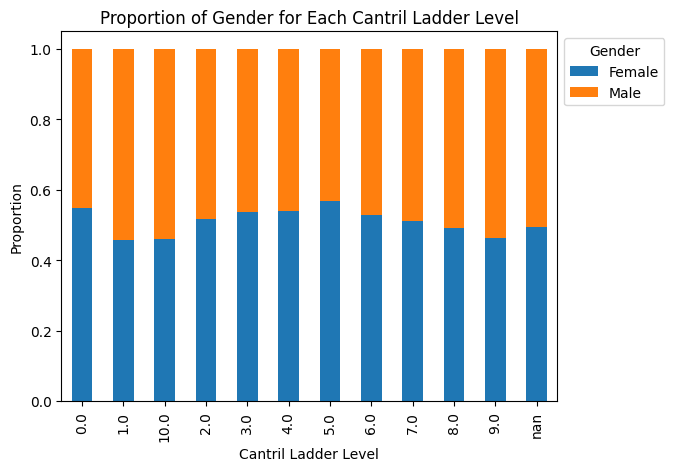

In [13]:
df0["cantril_ladder"] = df0["cantril_ladder"].astype(str)  # Convert to string for categorical representation

# Count the occurrences of each combination of cantril_ladder and gender
counts = df0.groupby(["cantril_ladder", "gender"]).size().unstack(fill_value=0)

# Calculate the proportion of each gender for each cantril_ladder level
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plotting the bar chart
proportions.plot(kind="bar", stacked=True)

plt.title("Proportion of Gender for Each Cantril Ladder Level")
plt.xlabel("Cantril Ladder Level")
plt.ylabel("Proportion")
plt.legend(title="Gender", bbox_to_anchor=(1, 1))
plt.show()

i2_health
0.0      11203
2.0       5570
10.0      4194
1.0       3986
5.0       3709
         ...  
490.0        1
124.0        1
199.0        1
76.0         1
77.0         1
Name: count, Length: 127, dtype: int64


Text(0, 0.5, 'Count')

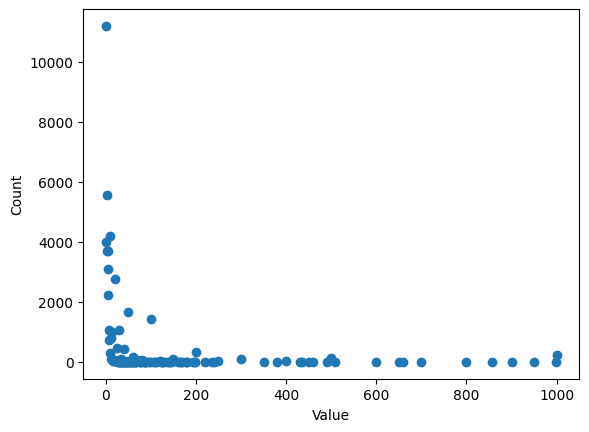

In [18]:
print(df0["i2_health"].value_counts())
#  plot x axis is number, y axis is count
plt.scatter(df0["i2_health"].value_counts().index, df0["i2_health"].value_counts().values)
plt.xlabel("Value")
plt.ylabel("Count")

In [23]:
print(df0["r1_1"].value_counts())
# remove string of agree and disagree
df0["r1_1"] = df0["r1_1"].replace("7 - Agree", 7)
df0["r1_1"] = df0["r1_1"].replace("1 – Disagree", 1)
print(df0["r1_1"].value_counts())

r1_1
7               9874
4               8506
5               7091
6               5446
3               5076
1 – Disagree    4580
2               4237
Name: count, dtype: int64
r1_1
7    9874
4    8506
5    7091
6    5446
3    5076
1    4580
2    4237
Name: count, dtype: int64


i12_health_mean
5.000000    1446
4.529412     865
4.764706     841
3.823529     829
4.411765     816
            ... 
1.352941      75
1.176471      58
1.294118      54
1.117647      47
1.058824      25
Name: count, Length: 69, dtype: int64
d1_health_mean
0.066667    24186
0.133333     4736
0.200000     3036
0.266667     1517
0.333333      650
0.400000      232
0.466667       73
0.533333       18
0.600000        4
Name: count, dtype: int64
0.022323843356115383


Text(0, 0.5, 'i12_health')

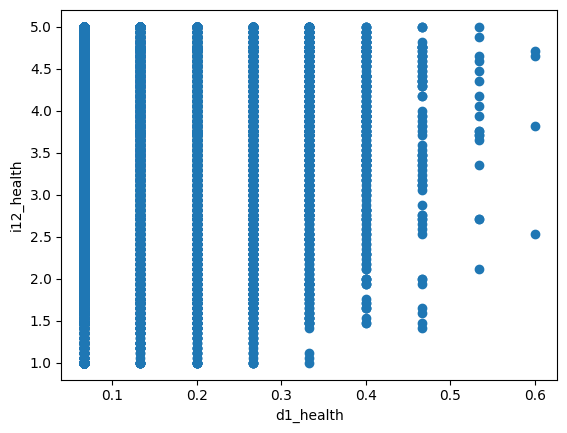

In [64]:
df = pd.read_csv("../data/cleaned_data.csv")
# print(df["PHQ4_1"].value_counts())
# plt.scatter(df["PHQ4_1"], df["d1_health_1"])
# plt.xlabel("phq4_1")
# plt.ylabel("d1_health_1")
# plt.xlim(0,1)
phq_name_list = [col for col in df.columns if col.startswith("PHQ_")]
d1_health_name_list = [col for col in df.columns if col.startswith("d1_health_")]
i12_health_name_list = [col for col in df.columns if col.startswith("i12_health_")]
        
df_new = df.copy()
df_new["PHQ4_mean"] = df[phq_name_list].mean(axis = 1)
df_new["d1_health_mean"] = df[d1_health_name_list].mean(axis = 1)
df_new["i12_health_mean"] = df[i12_health_name_list].mean(axis = 1)
df_new = df_new[df_new["d1_health_mean"] < 99]

corr1 = df_new["i12_health_mean"].corr(df_new["d1_health_mean"])
print(df_new["i12_health_mean"].value_counts())
print(df_new["d1_health_mean"].value_counts())
# corr2 = df_new["i12_health_mean"].corr(df_new["PHQ4_mean"])
print(corr1)

plt.scatter(df_new["d1_health_mean"], df_new["i12_health_mean"])
plt.xlabel("d1_health")
plt.ylabel("i12_health")

## Compare with 0 threshold and 1006 threshold

In [ ]:
grouped_df0 = df0.groupby(["week_number", "i12_health_1"]).size().reset_index(name='count')

# Pivot the DataFrame
pivoted_df0 = grouped_df0.pivot_table(index='week_number', columns='i12_health_1', values='count', fill_value=0).reset_index()

# Calculate proportion_mask_no
pivoted_df0['proportion_mask_no'] = pivoted_df0[0] / (pivoted_df0[0] + pivoted_df0[1])

# Rename columns
pivoted_df0.columns = ['week_number', 'count_mask_no', 'count_mask_yes', 'proportion_mask_no']

# Convert columns to integer type
pivoted_df0[['count_mask_no', 'count_mask_yes']] = pivoted_df0[['count_mask_no', 'count_mask_yes']].astype(int)

# Print the resulting DataFrame
# print(pivoted_df0)

grouped_df = df.groupby(["week_number", "i12_health_1"]).size().reset_index(name='count')
# Pivot the DataFrame
pivoted_df = grouped_df.pivot_table(index='week_number', columns='i12_health_1', values='count', fill_value=0).reset_index()
# Calculate proportion_mask_no
pivoted_df['proportion_mask_no'] = pivoted_df[0] / (pivoted_df[0] + pivoted_df[1])
# Rename columns
pivoted_df.columns = ['week_number', 'count_mask_no', 'count_mask_yes', 'proportion_mask_no']

# Convert columns to integer type
pivoted_df[['count_mask_no', 'count_mask_yes']] = pivoted_df[['count_mask_no', 'count_mask_yes']].astype(int)

# Print the resulting DataFrame
# print(pivoted_df)

# df2 
grouped_df2 = df2.groupby(["week_number", "i12_health_1"]).size().reset_index(name='count')

# Pivot the DataFrame
pivoted_df2 = grouped_df2.pivot_table(index='week_number', columns='i12_health_1', values='count', fill_value=0).reset_index()
# Calculate proportion_mask_no
pivoted_df2['proportion_mask_no'] = pivoted_df2[0] / (pivoted_df2[0] + pivoted_df2[1])
# Rename columns
pivoted_df2.columns = ['week_number', 'count_mask_no', 'count_mask_yes', 'proportion_mask_no']

# Convert columns to integer type
pivoted_df2[['count_mask_no', 'count_mask_yes']] = pivoted_df2[['count_mask_no', 'count_mask_yes']].astype(int)

# Print the resulting DataFrame
# print(pivoted_df2)

# plot line plot between 0 and 1006
merged_df = pd.merge(pivoted_df0, pivoted_df, on='week_number', how='outer', suffixes=('_pivoted_df0', '_pivoted_df1006'))
# print(merged_df)
# plt.scatter(merged_df["proportion_mask_no_pivoted_df0"], merged_df["proportion_mask_no_pivoted_df1006"])

# plot line plot between 1006 and 10029
merged_df2 = pd.merge(pivoted_df2, pivoted_df, on='week_number', how='outer', suffixes=('_pivoted_df10029', '_pivoted_df1006'))
plt.scatter(merged_df2["proportion_mask_no_pivoted_df10029"], merged_df2["proportion_mask_no_pivoted_df1006"])

In [ ]:
#  As seen above, because more columns are included the trendency has been blocked from the result due to over-deleted rows with null

